# Calibrating A Camera

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

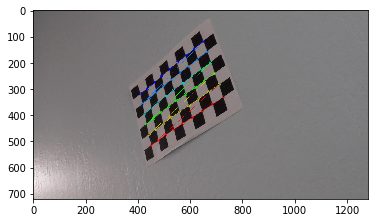

In [2]:
import glob

# Read in the images
image_name = glob.glob('./camera_cal/calibration*.jpg')

# Make object and image points
object_points = [] #3D points in real world space
image_points = [] #2D points in image plane

# Images that it found
found = []

# Prepare object points like (0,0,0), (1,0,0), (2,0,0), ..., (7,5,0)
objp = np.zeros((6*9,3),np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2) #x,y coordinates

pattern = (9,6)

for fname in image_name:
    # Read in the image
    img = cv2.imread(fname)
    
    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray,pattern,None)

    # If corners are found, add object points and image points
    if ret == True:
        image_points.append(corners)
        object_points.append(objp)
        found.append(fname)
    
# Draw and display the corners
img = cv2.drawChessboardCorners(img,pattern,corners,ret)
plt.imshow(img)
plt.savefig('./turn_in/output_images/grid.jpg')

In [3]:
print(len(found))

17


In [4]:
# Calibrate the Camera
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(object_points, image_points, gray.shape[::-1], None, None)

distorted = []
undistorted = []
for i in image_name:
    # Read in the image
    img = mpimg.imread(i)
    distorted.append(img)
    
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    undistorted.append(dst)

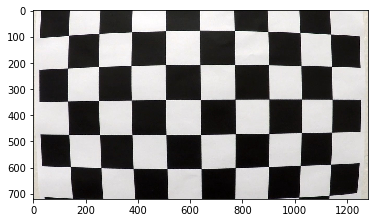

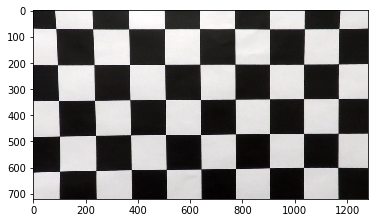

In [5]:
ind = 4
plt.figure()
plt.imshow(distorted[ind])
plt.savefig('./turn_in/output_images/checker_dist.jpg')
plt.figure()
plt.imshow(undistorted[ind])
plt.savefig('./turn_in/output_images/checker_undist.jpg')

In [6]:
np.savez('calibration',mtx,dist)

In [7]:
load = np.load('calibration.npz')
print(load.files)

['arr_0', 'arr_1']
